In [1]:
import pandas as pd

In [2]:
beer_df = pd.read_csv("./data/beer.csv")

In [3]:
beer_df.head(5)

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77


In [6]:
beer_df.shape

(20, 5)

In [7]:
beer_df

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


### Scaling the features

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [21]:
x_scaled = scaler.fit_transform(
    beer_df[['calories', 'alcohol', 'sodium', 'cost']]
)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [22]:
x_scaled

array([[ 0.38791334,  0.43380786,  0.00779468, -0.45682969],
       [ 0.6250656 ,  0.62241997,  0.63136906, -0.45682969],
       [ 0.82833896, -3.14982226,  0.00779468, -0.10269815],
       [ 1.26876459,  0.90533814, -1.23935408,  1.66795955],
       [ 0.65894449,  0.71672602, -0.6157797 ,  1.95126478],
       [ 0.42179223,  0.3395018 ,  1.25494344, -1.5192243 ],
       [ 1.43815906,  1.1882563 ,  1.41083704, -0.66930861],
       [ 0.55730781,  0.43380786,  1.87851782, -0.52765599],
       [-1.1366369 ,  0.05658363, -0.7716733 , -0.45682969],
       [-0.66233238, -0.5092527 , -1.08346049, -0.66930861],
       [ 0.25239776,  0.3395018 ,  0.47547547, -0.38600338],
       [-1.03500022, -0.13202848,  0.00779468, -0.24435076],
       [ 0.08300329, -0.03772242, -0.6157797 ,  0.03895447],
       [ 0.59118671,  0.43380786,  0.63136906,  1.88043848],
       [ 0.55730781,  0.71672602, -1.39524768,  2.0929174 ],
       [-2.18688263, -1.82953748,  0.00779468, -0.81096123],
       [ 0.21851887,  0.

### Clustermap

In [24]:
import matplotlib.pyplot as plt
import seaborn as sn

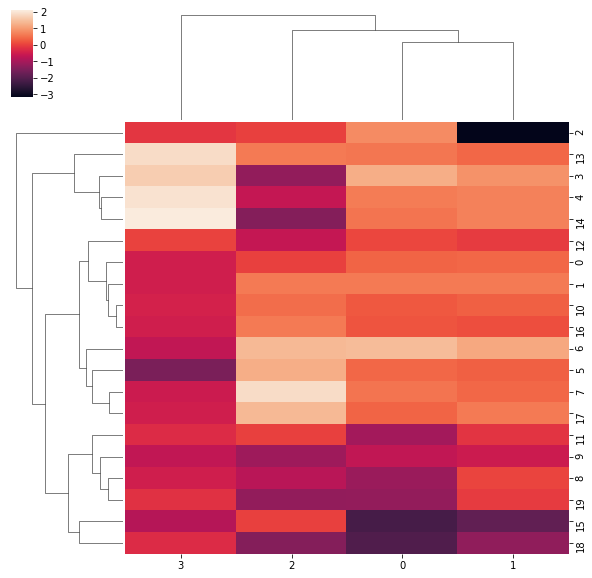

In [26]:
sn.clustermap(x_scaled);

In [28]:
from sklearn.cluster import KMeans

In [33]:
kmeans = KMeans(6, random_state=100) #Since there is 6 group

In [34]:
kmeans.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

In [37]:
beer_df['cluster'] = kmeans.labels_

#### Analyzing Segments

In [38]:
beer_df[beer_df.cluster == 5]

,name,calories,sodium,alcohol,cost,clister,cluster
15,Pabst_Extra_Light,68,15,2.3,0.38,5,5
18,Olympia_Goled_Light,72,6,2.9,0.46,5,5


In [39]:
beer_df[beer_df.cluster == 4]

,name,calories,sodium,alcohol,cost,clister,cluster
0,Budweiser,144,15,4.7,0.43,4,4
1,Schlitz,151,19,4.9,0.43,4,4
10,Coors,140,18,4.6,0.44,4,4
12,Michelob_Light,135,11,4.2,0.50,4,4
16,Hamms,139,19,4.4,0.43,4,4


In [40]:
beer_df[beer_df.cluster == 3]

,name,calories,sodium,alcohol,cost,clister,cluster
3,Kronenbourg,170,7,5.2,0.73,3,3
4,Heineken,152,11,5.0,0.77,3,3
13,Becks,150,19,4.7,0.76,3,3
14,Kirin,149,6,5.0,0.79,3,3


In [41]:
beer_df[beer_df.cluster == 2]

,name,calories,sodium,alcohol,cost,clister,cluster
2,Lowenbrau,157,15,0.9,0.48,2,2


In [42]:
beer_df[beer_df.cluster == 1]

,name,calories,sodium,alcohol,cost,clister,cluster
5,Old_Milwaukee,145,23,4.6,0.28,1,1
6,Augsberger,175,24,5.5,0.40,1,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1,1
17,Heilemans_Old_Style,144,24,4.9,0.43,1,1


In [43]:
beer_df[beer_df.cluster == 0]

,name,calories,sodium,alcohol,cost,clister,cluster
8,Miller_Lite,99,10,4.3,0.43,0,0
9,Budweiser_Light,113,8,3.7,0.40,0,0
11,Coors_Light,102,15,4.1,0.46,0,0
19,Schlitz_Light,97,7,4.2,0.47,0,0


In [45]:
beer_df[beer_df.cluster == 5].mean()

calories    70.00
sodium      10.50
alcohol      2.60
cost         0.42
clister      5.00
cluster      5.00
dtype: float64

In [46]:
beer_df[beer_df.cluster == 5].std()

calories    2.828427
sodium      6.363961
alcohol     0.424264
cost        0.056569
clister     0.000000
cluster     0.000000
dtype: float64